In [50]:
import os 
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

# Classifier

## Collect data

In [51]:
dirs = os.listdir('save_random_search')

parameters_to_keep = [
    'classifier_hiddenlayer_dim',
    'embeddingmodel_output',
    'model_train_classifier_learning_rate',
    'model_train_classifier_momentum',
    'model_train_classifier_weight_decay',
    'model_train_embedding_learning_rate',
    'model_train_embedding_momentum',
    'model_train_embedding_weight_decay',
    'model_train_n_epoch',
]

results = {
    'classifier_hiddenlayer_dim' : [],
    'embeddingmodel_output' : [],
    'model_train_classifier_learning_rate' : [],
    'model_train_classifier_momentum' : [],
    'model_train_classifier_weight_decay' : [],
    'model_train_embedding_learning_rate' : [],
    'model_train_embedding_momentum' : [],
    'model_train_embedding_weight_decay' : [],
    'model_train_n_epoch' : [],

    'min_valid_loss' : [],
    'test_f1_max' : [],
    'train_f1_max' : [],
    'valid_f1_max' : [],
    'filename' : []
}

for current_dir in os.listdir('save_random_search'):
    with open(f'save_random_search/{current_dir}/config.json', 'r') as file:
        config = json.load(file)

    results["filename"].append(f'save_random_search/{current_dir}')
    for key in parameters_to_keep:
        results[key].append(config[key])

    results["min_valid_loss"].append(
        min(pd.read_csv(f'save_random_search/{current_dir}/loss_train.csv')['0'])
    )

    metrics_file = pd.read_csv(f'save_random_search/{current_dir}/metrics_save.csv')
    results["test_f1_max"].append(
        max(metrics_file.loc[metrics_file["loop"] == "test",'f1'])
    )
    results["train_f1_max"].append(
        max(metrics_file.loc[metrics_file["loop"] == "train",'f1'])
    )
    results["valid_f1_max"].append(
        max(metrics_file.loc[metrics_file["loop"] == "validation",'f1'])
    )

results = pd.DataFrame(results)

# plot Data

In [52]:
results.head()

,classifier_hiddenlayer_dim,embeddingmodel_output,model_train_classifier_learning_rate,model_train_classifier_momentum,model_train_classifier_weight_decay,model_train_embedding_learning_rate,model_train_embedding_momentum,model_train_embedding_weight_decay,model_train_n_epoch,min_valid_loss,test_f1_max,train_f1_max,valid_f1_max,filename
0,300,last_hidden_state,0.000156,0.722222,0.006211,0.00001,0.9,0.01,10,0.057269,0.489253,0.955197,0.505456,save_random_search/32
1,50,last_hidden_state,0.000039,0.677778,0.053105,0.00001,0.9,0.01,10,0.216712,0.483300,0.876776,0.504960,save_random_search/35
2,10,last_hidden_state,0.002500,0.766667,0.047895,0.00001,0.9,0.01,10,0.288275,0.474041,0.779145,0.510747,save_random_search/34
3,50,last_hidden_state,0.000156,0.544444,0.084368,0.00001,0.9,0.01,10,0.162321,0.492725,0.910461,0.517526,save_random_search/33
4,10,last_hidden_state,0.000625,0.677778,0.068737,0.00001,0.9,0.01,10,0.506136,0.486276,0.659079,0.496693,save_random_search/20


### validation_loss

In [53]:
set(results["model_train_classifier_learning_rate"])

{1.953125e-05,
 3.90625e-05,
 7.8125e-05,
 0.00015625,
 0.0003125,
 0.000625,
 0.00125,
 0.0025,
 0.005,
 0.01}

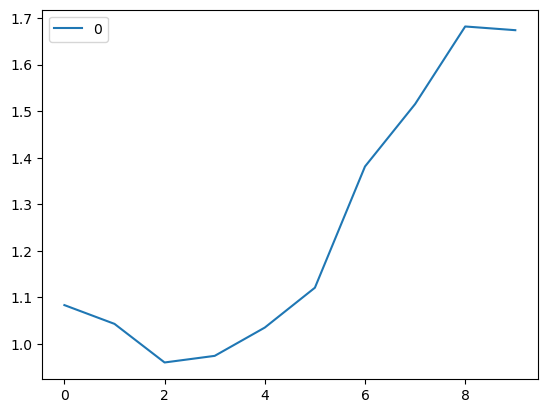

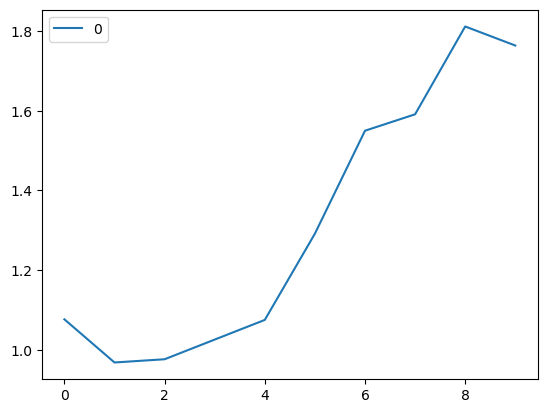

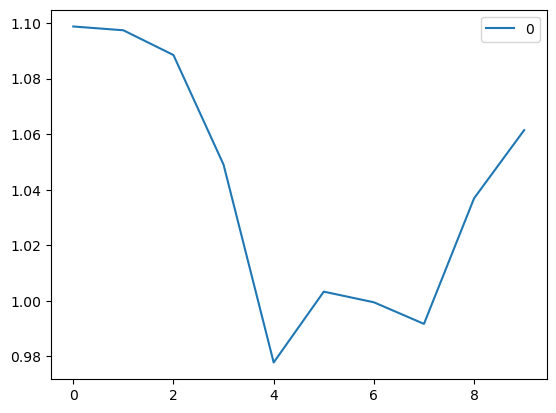

In [59]:
for file in results.loc[results["model_train_classifier_learning_rate"] >= 0.01,"filename"].to_list():
    pd.read_csv(f"{file}/validation_loss.csv").plot(y = "0")


### Learning rate

In [24]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "log",
        # "categoryorder" : "median ascending",
       "title" : "Learning Rate"
    },
   "yaxis":{"title" : "F1-Score (max)"},
   "title" : {"text" : "Classifier : Impact of Learning rate on the F1-score"},
})
fig.add_trace( go.Box(
                x = results["model_train_classifier_learning_rate"], 
                y = results["test_f1_max"],
                xaxis='x',
                name = "Test"
))
fig.add_trace( go.Box(
                x = results["model_train_classifier_learning_rate"], 
                y = results["valid_f1_max"],
                xaxis='x',
                name = "Validation"
))

# fig.add_trace( go.Box(
#                 x = results["model_train_classifier_learning_rate"], 
#                 y = results["train_f1_max"],
#                 xaxis='x',
#                 name = "Train"
# ))
fig

In [25]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "log",
        # "categoryorder" : "median ascending",
       "title" : "Learning Rate"
    },
   "yaxis":{"title" : "Validation Loss Value (min)"},
   "title" : {"text" : "Classifier : Impact of Learning rate on the Minimum validation loss"},
})
fig.add_trace( go.Box(
                x = results["model_train_classifier_learning_rate"], 
                y = results["min_valid_loss"],
                xaxis='x',
                name = "Validation"
))

fig

### Momentum

In [26]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "log",
        # "categoryorder" : "median ascending",
       "title" : "Momentum"
    },
   "yaxis":{"title" : "F1-Score (max)"},
   "title" : {"text" : "Classifier : Impact of momentum on the F1-score"},
})
fig.add_trace( go.Box(
                x = results["model_train_classifier_momentum"], 
                y = results["test_f1_max"],
                xaxis='x',
                name = "Test"
))
fig.add_trace( go.Box(
                x = results["model_train_classifier_momentum"], 
                y = results["valid_f1_max"],
                xaxis='x',
                name = "Validation"
))

# fig.add_trace( go.Box(
#                 x = results["model_train_classifier_learning_rate"], 
#                 y = results["train_f1_max"],
#                 xaxis='x',
#                 name = "Train"
# ))
fig

In [27]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "log",
        # "categoryorder" : "median ascending",
       "title" : "Momentum"
    },
   "yaxis":{"title" : "Validation Loss Value (min)"},
   "title" : {"text" : "Classifier : Impact of momentum on the Minimum validation loss"},
})
fig.add_trace( go.Box(
                x = results["model_train_classifier_momentum"], 
                y = results["min_valid_loss"],
                xaxis='x',
                name = "Validation"
))

fig

### Weight decay NEEDS TO BE REMADE WITH  LESS VALUES

In [28]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "category",
        "categoryorder" : "median ascending",
       "title" : "Classifier : Weight decay"
    },
   "yaxis":{"title" : "F1-Score (max)"},
   "title" : {"text" : "Impact of weight decay on the F1-score"},
})
fig.add_trace( go.Box(
                x = results["model_train_classifier_weight_decay"], 
                y = results["test_f1_max"],
                xaxis='x',
                name = "Test"
))
fig.add_trace( go.Box(
                x = results["model_train_classifier_weight_decay"], 
                y = results["valid_f1_max"],
                xaxis='x',
                name = "Validation"
))

# fig.add_trace( go.Box(
#                 x = results["model_train_classifier_learning_rate"], 
#                 y = results["train_f1_max"],
#                 xaxis='x',
#                 name = "Train"
# ))
fig

In [29]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "category",
        "categoryorder" : "median ascending",
       "title" : "Classifier : Weight decay"
    },
   "yaxis":{"title" : "Validation Loss Value (min)"},
   "title" : {"text" : "Impact of weight decay on the Minimum validation loss"},
})
fig.add_trace( go.Box(
                x = results["model_train_classifier_weight_decay"], 
                y = results["min_valid_loss"],
                xaxis='x',
                name = "Validation"
))

fig

### Hidden layer dimension (Needs additional values)

In [30]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "log",
        # "categoryorder" : "median ascending",
       "title" : "Classifier : Hidden layer dimension"
    },
   "yaxis":{"title" : "F1-Score (max)"},
   "title" : {"text" : "Impact of the dimension of the hidden layer on the F1-score"},
})
fig.add_trace( go.Box(
                x = results["classifier_hiddenlayer_dim"], 
                y = results["test_f1_max"],
                xaxis='x',
                name = "Test"
))
fig.add_trace( go.Box(
                x = results["classifier_hiddenlayer_dim"], 
                y = results["valid_f1_max"],
                xaxis='x',
                name = "Validation"
))

# fig.add_trace( go.Box(
#                 x = results["model_train_classifier_learning_rate"], 
#                 y = results["train_f1_max"],
#                 xaxis='x',
#                 name = "Train"
# ))
fig

In [31]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "log",
        # "categoryorder" : "median ascending",
       "title" : "Classifier : Hidden layer dimension"
    },
   "yaxis":{"title" : "Validation Loss Value (min)"},
   "title" : {"text" : "Impact of the dimension of the hidden layer on the Minimum validation loss"},
})
fig.add_trace( go.Box(
                x = results["classifier_hiddenlayer_dim"], 
                y = results["min_valid_loss"],
                xaxis='x',
                name = "Validation"
))

fig

# Embedder

## Collect data

In [32]:
parameters_to_keep = [
    'classifier_hiddenlayer_dim',
    'embeddingmodel_output',
    'model_train_classifier_learning_rate',
    'model_train_classifier_momentum',
    'model_train_classifier_weight_decay',
    'model_train_embedding_learning_rate',
    'model_train_embedding_momentum',
    'model_train_embedding_weight_decay',
    'model_train_n_epoch',
]

results = {
    'classifier_hiddenlayer_dim' : [],
    'embeddingmodel_output' : [],
    'model_train_classifier_learning_rate' : [],
    'model_train_classifier_momentum' : [],
    'model_train_classifier_weight_decay' : [],
    'model_train_embedding_learning_rate' : [],
    'model_train_embedding_momentum' : [],
    'model_train_embedding_weight_decay' : [],
    'model_train_n_epoch' : [],

    'min_valid_loss' : [],
    'test_f1_max' : [],
    'train_f1_max' : [],
    'valid_f1_max' : [],
    'filename' : []
}

for current_dir in os.listdir('save_random_search_embedder'):
    with open(f'save_random_search_embedder/{current_dir}/config.json', 'r') as file:
        config = json.load(file)

    results["filename"].append(f'save_random_search_embedder/{current_dir}')
    for key in parameters_to_keep:
        results[key].append(config[key])

    results["min_valid_loss"].append(
        min(pd.read_csv(f'save_random_search_embedder/{current_dir}/loss_train.csv')['0'])
    )

    metrics_file = pd.read_csv(f'save_random_search_embedder/{current_dir}/metrics_save.csv')
    results["test_f1_max"].append(
        max(metrics_file.loc[metrics_file["loop"] == "test",'f1'])
    )
    results["train_f1_max"].append(
        max(metrics_file.loc[metrics_file["loop"] == "train",'f1'])
    )
    results["valid_f1_max"].append(
        max(metrics_file.loc[metrics_file["loop"] == "validation",'f1'])
    )

results = pd.DataFrame(results)

## Plot Data

### Learning rate

In [33]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "log",
        # "categoryorder" : "median ascending",
       "title" : "Learning Rate"
    },
   "yaxis":{"title" : "F1-Score (max)"},
   "title" : {"text" : "Embedder : Impact of Learning rate on the F1-score"},
})
fig.add_trace( go.Box(
                x = results["model_train_embedding_learning_rate"], 
                y = results["test_f1_max"],
                xaxis='x',
                name = "Test"
))
fig.add_trace( go.Box(
                x = results["model_train_embedding_learning_rate"], 
                y = results["valid_f1_max"],
                xaxis='x',
                name = "Validation"
))

# fig.add_trace( go.Box(
#                 x = results["model_train_classifier_learning_rate"], 
#                 y = results["train_f1_max"],
#                 xaxis='x',
#                 name = "Train"
# ))
fig

In [34]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "log",
        # "categoryorder" : "median ascending",
       "title" : "Learning Rate"
    },
   "yaxis":{"title" : "Validation Loss Value (min)"},
   "title" : {"text" : "Embedder : Impact of Learning rate on the Minimum validation loss"},
})
fig.add_trace( go.Box(
                x = results["model_train_embedding_learning_rate"], 
                y = results["min_valid_loss"],
                xaxis='x',
                name = "Validation"
))

fig

### Weight decay

In [35]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "category",
      #  "categoryorder" : "median ascending",
       "title" : "Weight decay"
    },
   "yaxis":{"title" : "F1-Score (max)"},
   "title" : {"text" : "Embedder : Impact of weight decay on the F1-score"},
})
fig.add_trace( go.Box(
                x = results["model_train_embedding_weight_decay"], 
                y = results["test_f1_max"],
                xaxis='x',
                name = "Test"
))
fig.add_trace( go.Box(
                x = results["model_train_embedding_weight_decay"], 
                y = results["valid_f1_max"],
                xaxis='x',
                name = "Validation"
))

# fig.add_trace( go.Box(
#                 x = results["model_train_classifier_learning_rate"], 
#                 y = results["train_f1_max"],
#                 xaxis='x',
#                 name = "Train"
# ))
fig

In [36]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "category",
        "categoryorder" : "median ascending",
       "title" : "Weight decay"
    },
   "yaxis":{"title" : "Validation Loss Value (min)"},
   "title" : {"text" : "Embedder : Impact of weight decay on the Minimum validation loss"},
})
fig.add_trace( go.Box(
                x = results["model_train_embedding_weight_decay"], 
                y = results["min_valid_loss"],
                xaxis='x',
                name = "Validation"
))

fig

### Embedding output

In [44]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "category",
      #   "categoryorder" : "median ascending",
       "title" : "Embedding ouptut"
    },
   "yaxis":{"title" : "F1-Score (max)"},
   "title" : {"text" : "Embedder : Impact of embedding output on the F1-score"},
})
fig.add_trace( go.Box(
                x = results["embeddingmodel_output"], 
                y = results["test_f1_max"],
                xaxis='x',
                name = "Test"
))
fig.add_trace( go.Box(
                x = results["embeddingmodel_output"], 
                y = results["valid_f1_max"],
                xaxis='x',
                name = "Validation"
))

# fig.add_trace( go.Box(
#                 x = results["model_train_classifier_learning_rate"], 
#                 y = results["train_f1_max"],
#                 xaxis='x',
#                 name = "Train"
# ))
fig

In [40]:
fig = go.Figure(layout = {
   "xaxis":{
       "domain" : [0,1],
       "type" : "category",
        # "categoryorder" : "median ascending",
       "title" : "Learning Rate"
    },
   "yaxis":{"title" : "Validation Loss Value (min)"},
   "title" : {"text" : "Embedder : Impact of Learning rate on the Minimum validation loss"},
})
fig.add_trace( go.Box(
                x = results["embeddingmodel_output"], 
                y = results["min_valid_loss"],
                xaxis='x',
                name = "Validation"
))

fig